In [19]:
#Sireesha Aouradker form questions 49 to 64

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time


import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

test_measure = pd.read_csv("test_measure.csv")
subject_info = pd.read_csv("subject-info.csv")

In [20]:
# 49 Identify the test name that had the shortest time duration. 

# Calculate duration for each test (ID_test)
duration_per_test = test_measure.groupby("ID_test")["time"].agg(["min", "max"])

print(duration_per_test)

duration_per_test["duration"] = duration_per_test["max"] - duration_per_test["min"]

# Identify the test with the shortest duration
shortest_test = duration_per_test["duration"].idxmin()
print(shortest_test)

shortest_duration = duration_per_test.loc[shortest_test, "duration"]

print(f"Test with the shortest duration is '{shortest_test}' with a duration of {shortest_duration} minutes.")



         min   max
ID_test           
100_1      0  1026
101_1      0  1024
102_1      0   870
103_1      0   861
104_1      0  1144
...      ...   ...
98_1       0  1205
99_1       0   927
99_47      0   768
99_54      0   899
9_1        0   895

[992 rows x 2 columns]
564_1
Test with the shortest duration is '564_1' with a duration of 495 minutes.


In [21]:
# 50 What is the percentage difference in mean Carbon dioxide production between male and female athletes?

merged_df = pd.merge(test_measure, subject_info, on='ID')

# Group by 'sex' and calculate the mean of 'VCO2'
mean_vco2_by_sex = merged_df.groupby('Sex')['VCO2'].mean()

# Calculate percentage difference between the means of sex 0 and 1
percentage_difference = ((mean_vco2_by_sex[1] - mean_vco2_by_sex[0]) / mean_vco2_by_sex[0]) * 100

mean_vco2_by_sex, percentage_difference


(Sex
 0    2497.198164
 1    1765.666184
 Name: VCO2, dtype: float64,
 -29.294110102267958)

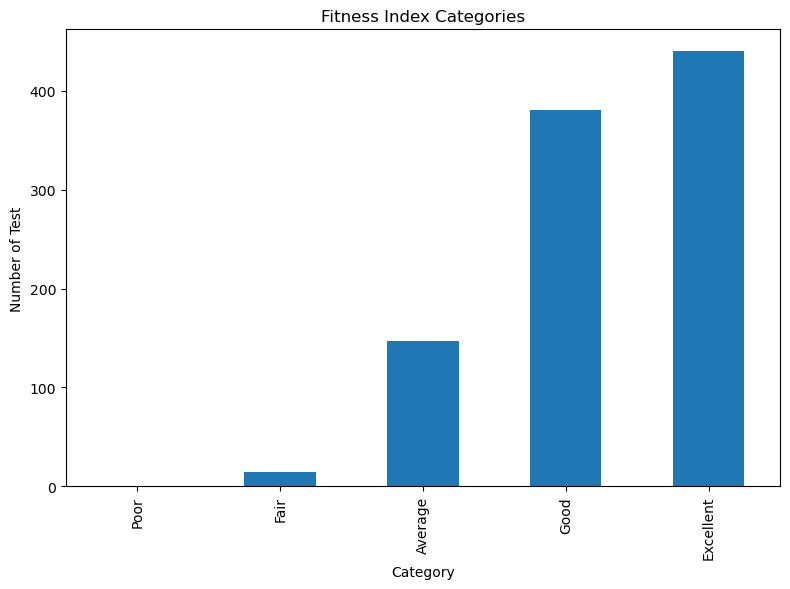

In [22]:
# 51 Calculate the Fitness Index, generate a bar chart of Fitness Index categories, and export it as SVG file.

max_vo2 = test_measure.groupby('ID_test')['VO2'].max().reset_index()
max_vo2.rename(columns={'VO2': 'Max_VO2'}, inplace=True)

# Merge with subject info
merged_df = pd.merge(subject_info, max_vo2, on='ID_test')

# Compute Fitness Index = Max_VO2 / Weight
merged_df['Fitness_Index'] = merged_df['Max_VO2'] / merged_df['Weight']

# Categorize Fitness Index into bins
bins = [0, 20, 30, 40, 50, float('inf')]
labels = ['Poor', 'Fair', 'Average', 'Good', 'Excellent']
merged_df['Fitness_Category'] = pd.cut(merged_df['Fitness_Index'], bins=bins, labels=labels)

# Count categories for the bar chart
category_counts = merged_df['Fitness_Category'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar')
plt.title('Fitness Index Categories')
plt.xlabel('Category')
plt.ylabel('Number of Test')
plt.tight_layout()

plt.savefig("test.svg", format="svg")

plt.show()



In [23]:
#52 Transpose this numpy matrix. and calculate sum of each row after transposing. 
#Find the row with highest sum(after transposing)

#input array
arr = np.array([[3, 5, 7, 9],
                   [2, 0, 8, 10],
                   [1, 4, 8, 12],
                   [5, 9, 14, 15]])

transposed_arr = arr.T
sum_row = np.sum(transposed_arr, axis=1)
row_max_sum = np.argmax(sum_row)

print("The given matrix:\n", arr)
print("The transposed matrix:\n", transposed_arr)
print("Sum of each row:", sum_row)
print("The row with the highest sum: (index starts with 0)", row_max_sum)

The given matrix:
 [[ 3  5  7  9]
 [ 2  0  8 10]
 [ 1  4  8 12]
 [ 5  9 14 15]]
The transposed matrix:
 [[ 3  2  1  5]
 [ 5  0  4  9]
 [ 7  8  8 14]
 [ 9 10 12 15]]
Sum of each row: [11 18 37 46]
The row with the highest sum: (index starts with 0) 3


In [24]:
# 53 Display participant details with highest average cardiorespiratory fitness in terms of VO2 max.
# Group the test_measure data by 'ID' and calculate the average VO2 per participant
avg_vo2 = test_measure.groupby('ID')['VO2'].mean().reset_index()
avg_vo2.rename(columns={'VO2': 'Average_VO2_Max'}, inplace=True)

# Find the maximum average VO2 max value
max_vo2 = avg_vo2['Average_VO2_Max'].max()

# Filter the participant(s) with the highest average VO2 max
top_participants = avg_vo2[avg_vo2['Average_VO2_Max'] == max_vo2]

# Merge with subject_info to get detailed participant information
result = pd.merge(top_participants, subject_info, on='ID')

result[['ID', 'Average_VO2_Max', 'Age', 'Weight', 'Height', 'Sex']]

,ID,Average_VO2_Max,Age,Weight,Height,Sex
0,409,3994.835294,23.6,86.0,190.0,0


In [34]:
# 54 calculate the heart rate reserve and show the distribution as density plot 




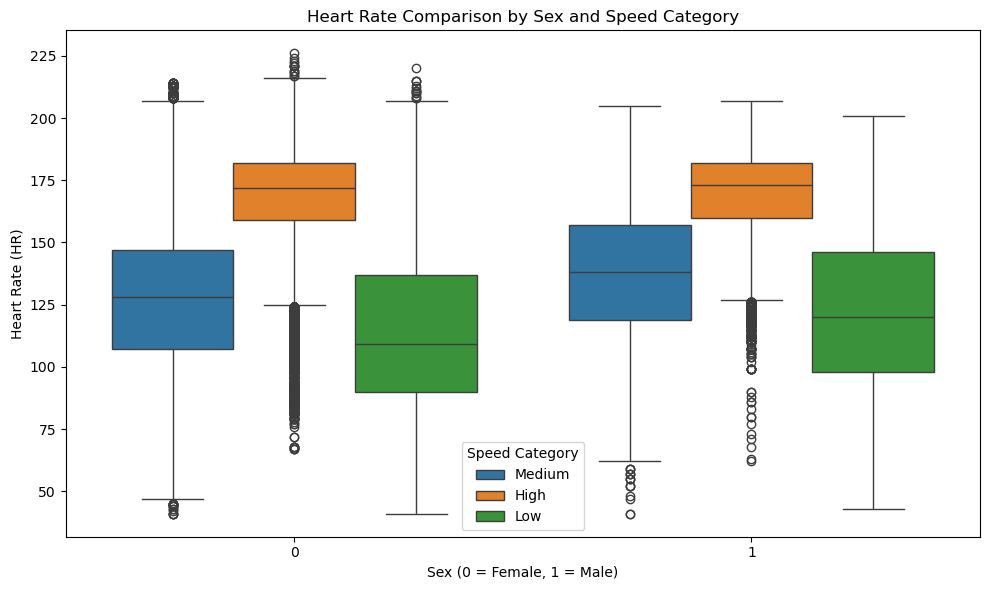

In [25]:
# 55 Create a boxplot comparing heart rates between males and females, showing hue as speed category.

# Merge the two datasets on ID
merged_df = pd.merge(test_measure, subject_info[['ID', 'Sex']], on='ID')

# Create a speed category column category like low < 5, medium 5-10, high > 10
def categorize_speed(speed):
    if speed < 5:
        return 'Low'
    elif speed <= 10:
        return 'Medium'
    else:
        return 'High'

merged_df['Speed_Category'] = merged_df['Speed'].apply(categorize_speed)

# Plotting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='HR', hue='Speed_Category', data=merged_df)
plt.title('Heart Rate Comparison by Sex and Speed Category')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Heart Rate (HR)')
plt.legend(title='Speed Category')
plt.tight_layout()
plt.show()


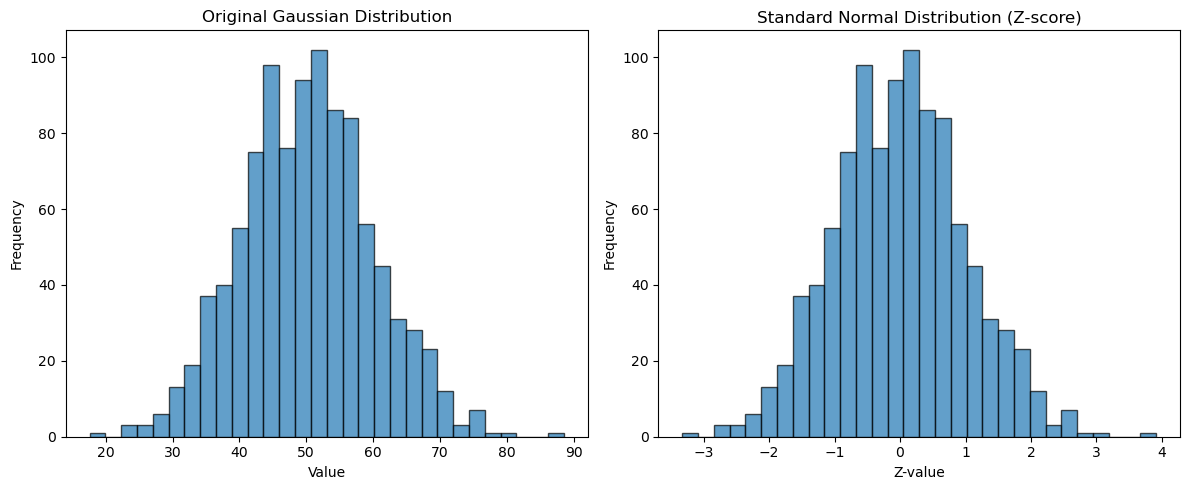

In [26]:
#56 Choose any feature that follows a Gaussian distribution, convert it into a standard normal distribution, and visualize the results?


# Create a Gaussian-distributed feature
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=1000)  # mean=50, std=10
df = pd.DataFrame({'original_feature': data})

# Convert it to a standard normal distribution 
df['standardized_feature'] = (df['original_feature'] - df['original_feature'].mean()) / df['original_feature'].std()

# Visualize both original and standardized features
plt.figure(figsize=(12, 5))

# Original distribution
plt.subplot(1, 2, 1)
plt.hist(df['original_feature'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Original Gaussian Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Standardized distribution
plt.subplot(1, 2, 2)
plt.hist(df['standardized_feature'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Standard Normal Distribution (Z-score)')
plt.xlabel('Z-value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [27]:
#57 Identify the participant who has taken maximum number of Graded Exercise test and justify.

subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

#total test count
test_counts = test_measure['ID_test'].drop_duplicates().groupby(test_measure['ID']).count()


max_tests = test_counts.max()
top_participant_ids = test_counts[test_counts == max_tests].index


top_participant_details = subject_info[subject_info['ID'].isin(top_participant_ids)]

print(top_participant_details[['ID', 'Age', 'Weight', 'Height']])
print(f"\max tests: {max_tests}")

      ID   Age  Weight  Height
928  506  46.1    72.0   173.0
937  506  46.8    69.5   173.0
945  506  47.7    68.0   173.0
948  506  48.2    70.9   177.2
953  506  49.1    71.5   173.0
\max tests: 5


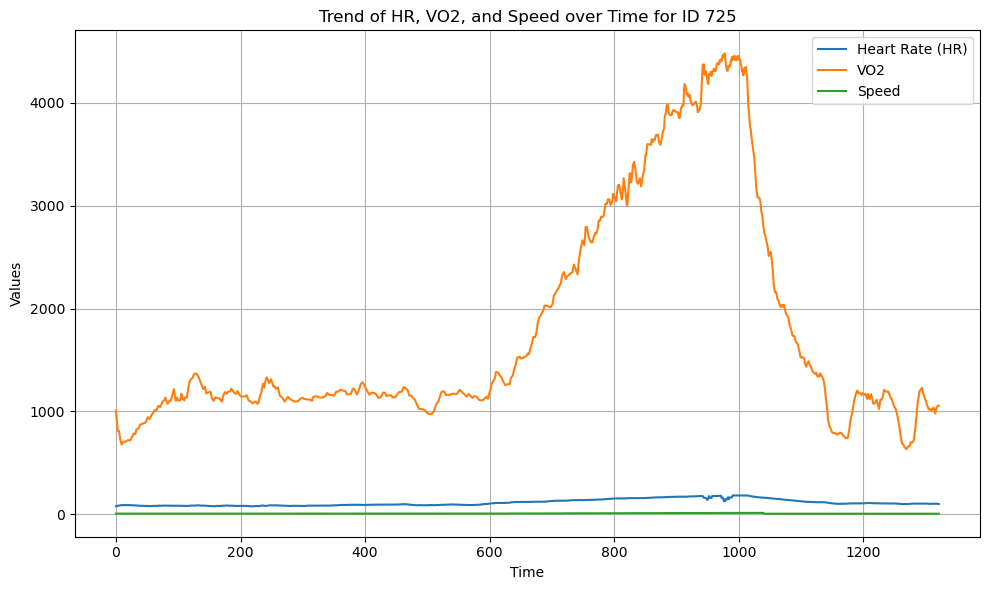

In [28]:
# 58 For participant ID 725 show trend of  any three variables against time in a single canva ?
# Filter test_measure data for ID 725

id_725_data = test_measure[test_measure["ID"] == 725]

# Plot three variables: HR (Heart Rate), VO2, and Speed against time in single canva
plt.figure(figsize=(10, 6))
plt.plot(id_725_data["time"], id_725_data["HR"], label="Heart Rate (HR)")
plt.plot(id_725_data["time"], id_725_data["VO2"], label="VO2")
plt.plot(id_725_data["time"], id_725_data["Speed"], label="Speed")

plt.title("Trend of HR, VO2, and Speed over Time for ID 725")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
#59 Create a scatter plot with a regression line using Altair, take a random sample data with features 'x' and 'y'.



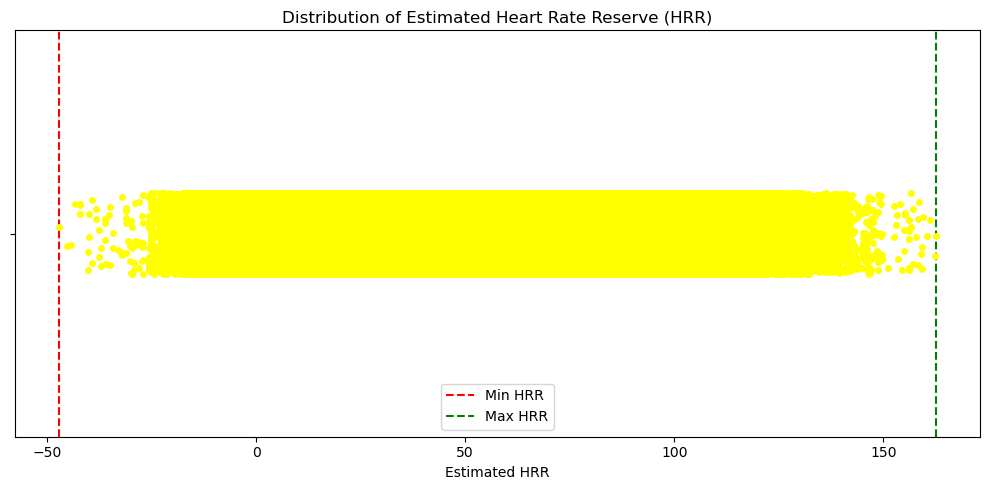

In [33]:
# 60 Use a strip plot to illustrate the distribution of Heart Rate Reserve (HRR) values, 
#highlighting the lowest and highest values to showcase the range of HRR.

merged_df = pd.merge(subject_info, test_measure, on='ID', how='inner')


merged_df['Estimated_HRR'] = (220 - merged_df['Age']) - merged_df['HR']

plt.figure(figsize=(10, 5))
sns.stripplot(data=merged_df, x='Estimated_HRR', color='yellow', jitter=True)

plt.axvline(merged_df['Estimated_HRR'].min(), color='red', linestyle='--', label='Min HRR')
plt.axvline(merged_df['Estimated_HRR'].max(), color='green', linestyle='--', label='Max HRR')

plt.title("Distribution of Estimated Heart Rate Reserve (HRR)")
plt.xlabel("Estimated HRR")
plt.legend()
plt.tight_layout()
plt.show()



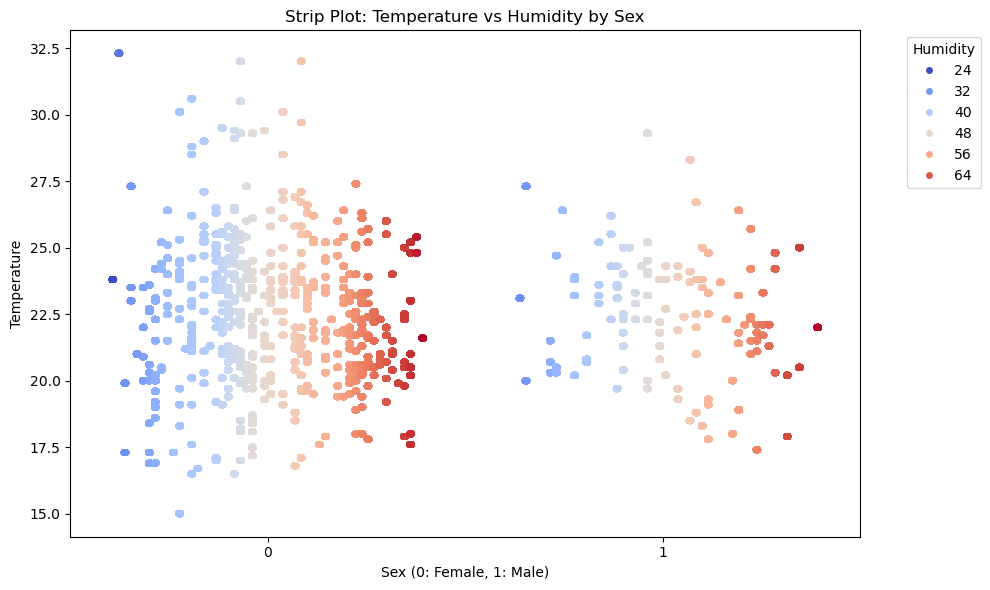

In [30]:
# 61 Create a swarm plot to visualize the relationship between humidity and temperature for each gender.

merged_df = pd.merge(subject_info, test_measure, on='ID', how='inner')
plt.figure(figsize=(10, 6))
sns.stripplot(data=merged_df, x='Sex', y='Temperature', hue='Humidity', palette='coolwarm', dodge=True)
plt.title('Strip Plot: Temperature vs Humidity by Sex')
plt.xlabel('Sex (0: Female, 1: Male)')
plt.ylabel('Temperature')
plt.legend(title='Humidity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

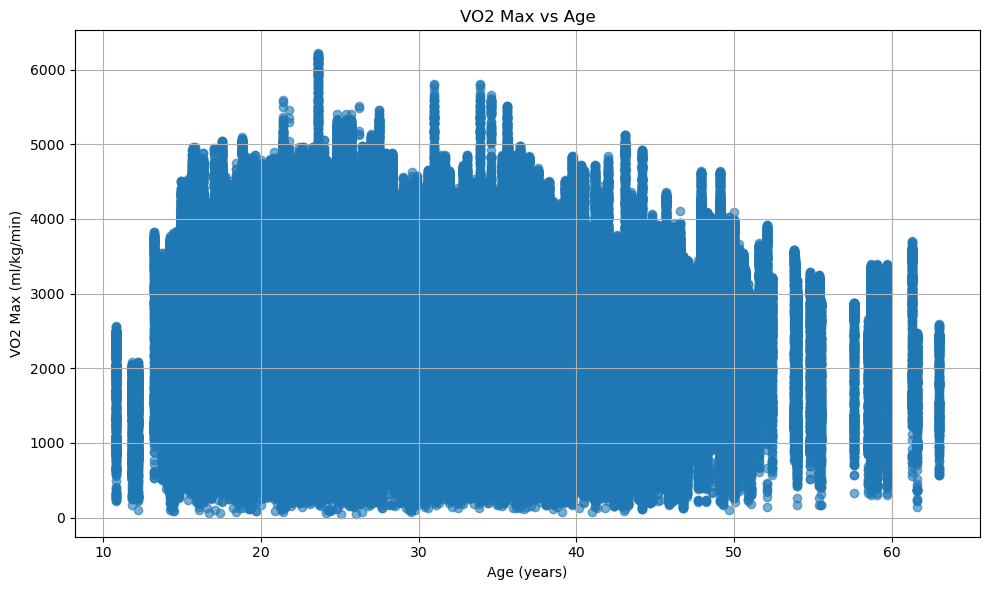

In [101]:
#62 Analyze the relationship between fitness levels and physiological attributes and identify trends in the  
#scatter plot of VO2 max (ml/kg/min) versus age

# Merge datasets using 'ID' column
merged_df = pd.merge(subject_info, test_measure, on='ID')

# Create scatter plot: VO2 vs Age
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Age'], merged_df['VO2'], alpha=0.6)
plt.title('VO2 Max vs Age')
plt.xlabel('Age (years)')
plt.ylabel('VO2 Max (ml/kg/min)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [31]:
#63 Calculate the warm-up time, GET time, cool-down time, for each athlete test and find athlete who has maximum GET time ?

# Initialize list for results
results = []

# group  by  test ID
for test_id, group in test_measure.groupby('ID_test'):
    group = group.sort_values('time')

    # To Find warm-up end (first time VO2 > 500)
    warmup_end = group[group['VO2'] > 500]['time'].min()
    if pd.isna(warmup_end):
        warmup_end = group['time'].min()

    # To Find GET end (first time RR > 30 after warm-up)
    get_end = group[(group['time'] > warmup_end) & (group['RR'] > 30)]['time'].min()
    if pd.isna(get_end):
        get_end = group['time'].max()

    # calclulate Compute durations
    warmup_time = warmup_end - group['time'].min()
    get_time = get_end - warmup_end
    cooldown_time = group['time'].max() - get_end

    results.append({
        'ID_test': test_id,
        'Warmup_Time': warmup_time,
        'GET_Time': get_time,
        'Cooldown_Time': cooldown_time
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# To Find the athlete with max GET time
max_get = results_df[results_df['GET_Time'] == results_df['GET_Time'].max()]

print (max_get)

    ID_test  Warmup_Time  GET_Time  Cooldown_Time
838   747_1            0      1156            467


In [32]:
# 64 Compare the time it takes to multiply each element in a large array by 2 
# using an explicit loop and a vectorized operation with NumPy

arr_size = 10000000
arr = np.arange(arr_size)

# using explicit loop method
start_time = time.time()
for i in range(arr_size):
    arr[i] = arr[i] * 2
end_time = time.time()
explicit_loop_time = end_time - start_time

# NumPy vectorized operation method
arr = np.arange(arr_size) # Reset array
start_time = time.time()
arr = arr * 2
end_time = time.time()
numpy_time = end_time - start_time

print(f"Time taken by explicit loop method: {explicit_loop_time:.4f} seconds")
print(f"Time taken by NumPy vectorized operation method: {numpy_time:.4f} seconds")
print(f"NumPy was {explicit_loop_time/numpy_time:.0f} times faster")

Time taken by explicit loop method: 9.9849 seconds
Time taken by NumPy vectorized operation method: 0.0430 seconds
NumPy was 232 times faster
